# K-Means Clustering

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
#from sklearn.datasets.samples_generator import make_blobs
#matplotlib inline

In [2]:
# X, y = make_blobs (n_samples = 5000, centers = [[4,1], [-2,-1],[2,-3], [1,1]], cluster_std=0.9)

# Generate a synthetic dataset with 5000 samples, 4 centers, and a standard deviation of 0.9 for each cluster
X, y = make_blobs(
    n_samples=5000, # The total number of data points to generate
    centers=[[4, 1], [-2, -1], [2, -3], [1, 1]],  # The coordinates of the centers of the clusters
    cluster_std=0.9 # The standard deviation of the clusters
)

# X contains the generated sample data points
# y contains the cluster labels for each data point, though it is not used further in this context

**make_blobs Parameters**:
  - `n_samples`: Number of data points to generate.
  - `centers`: Coordinates of cluster centers.
  - `cluster_std`: Standard deviation of each cluster.

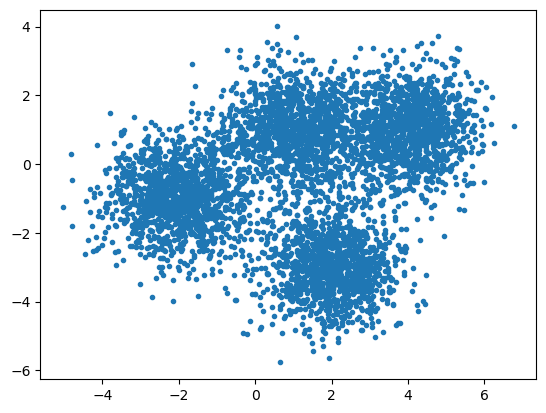

In [3]:
# Create a scatter plot of the generated data points
plt.scatter(
    X[:, 0],  # Select all rows in the first column (feature 1) of the generated data points
    X[:, 1],  # Select all rows in the second column (feature 2) of the generated data points
    marker='.'  # Use a dot marker for each data point
)

# Display the plot
plt.show()


## Retrieve Cluster Labels and Centroids

```python
# Get cluster labels and centroids
k_means_labels = kmeans.labels_            # Cluster labels assigned to each data point
k_means_cluster_centers = kmeans.cluster_centers_  # Coordinates of cluster centers
```

- **kmeans.labels_**: Array containing the cluster label for each data point.
- **kmeans.cluster_centers_**: Coordinates of the centroids (cluster centers) identified by K-means.

## Plotting the Clusters and Centroids

```python
# Plotting the clusters and centroids
fig = plt.figure(figsize=(8, 6))           # Create a new figure with specified size
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))  # Generate colors for clusters
ax = fig.add_subplot(1, 1, 1)              # Add a subplot to the figure

# Iterate over each cluster to plot its data points and centroid
for k, col in zip(range(len(k_means_cluster_centers)), colors):
    my_members = (k_means_labels == k)     # Boolean mask for data points in the current cluster
    cluster_center = k_means_cluster_centers[k]  # Coordinates of the centroid of current cluster
    
    # Plot data points of current cluster with white markers
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    
    # Plot centroid of current cluster with a circle marker
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=10)

# Set title and labels for the plot
ax.set_title('KMeans Clustering')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')

# Remove ticks from both axes
ax.set_xticks(())
ax.set_yticks(())
plt.show()  # Display the plot
```

- **Figure and Subplot Creation**:
  - `fig = plt.figure(figsize=(8, 6))`: Creates a new figure with a size of 8x6 inches.
  - `ax = fig.add_subplot(1, 1, 1)`: Adds a subplot to the figure.

- **Color Generation**:
  - `colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))`: Generates a range of colors for visualizing clusters.

- **Plotting Data Points and Centroids**:
  - Iterates over each cluster (`k`) to plot its data points and centroid.
  - `ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')`: Plots data points of the current cluster with white markers.
  - `ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=10)`: Plots centroid of the current cluster with a circle marker.

- **Setting Title and Labels**:
  - `ax.set_title('KMeans Clustering')`: Sets the title of the plot.
  - `ax.set_xlabel('Feature 1')` and `ax.set_ylabel('Feature 2')`: Label the x-axis and y-axis, respectively.

- **Final Adjustments**:
  - `ax.set_xticks(())` and `ax.set_yticks(())`: Remove ticks from both axes for a cleaner plot.
  - `plt.show()`: Displays the finalized plot.

These markdown notes provide a detailed explanation of each part of the Python code, helping to understand the fundamentals of K-means clustering and visualization using `sklearn` and `matplotlib`. Adjustments can be made based on specific dataset characteristics and visualization requirements.

In [4]:
# Initialize K-means clustering with 4 clusters (since we generated 4 centers)
k_means = KMeans(init = "k-means++", n_clusters=4, n_init = 'auto')

**K-means Initialization (`init="k-means++"`)**:
   - `init="k-means++"`: This parameter specifies the method for initialization of centroids before clustering begins. `"k-means++"` is a smart initialization technique that selects initial centroids in a way that speeds up convergence and leads to better results compared to random initialization. It ensures that centroids are spread out and not too close together initially.
   - `k-means++` is preferred over random initialization (`init="random"`) because it typically results in faster convergence and better clustering outcomes, especially with complex or large datasets.
     
**Number of Clusters (`n_clusters=4`)**:
   - `n_clusters=4`: Specifies the number of clusters to form as part of the K-means clustering process. In this case, `4` indicates that the algorithm will aim to identify and assign each data point to one of four clusters based on similarity.

**Number of Initializations (`n_init='auto'`)**:
   - `n_init='auto'`: This parameter determines the number of times the K-means algorithm will run with different initial centroid seeds. `'auto'` means that the algorithm will automatically choose a suitable number of initializations based on the size of the dataset (`n_samples`).
   - Each initialization produces a different clustering result, and the final model selects the one with the lowest inertia (sum of squared distances from data points to their assigned centroids), indicating the most optimal clustering.
 - The higher the `n_init`, the more computationally expensive the clustering process becomes, as the algorithm runs multiple times. However, it increases the likelihood of finding the globally optimal clustering solution.

These parameters collectively define how K-means clustering will be performed on the given dataset, aiming to identify and partition data points into four clusters based on their features. Adjustments to these parameters can influence the clustering results and performance based on the characteristics of the data being analyzed.

In [5]:
# Fit K-means clustering to the data
k_means.fit(X)

KMeans(n_clusters=4)

In [17]:
 # Cluster labels assigned to each data point
k_means_labels = k_means.labels_
k_means_labels

array([0, 0, 1, ..., 3, 0, 3])

**`k_means.labels_`**:
   - `k_means.labels_` is an attribute of the K-means clustering model (`k_means`). After fitting the model to the data, this attribute contains the cluster label assigned to each data point.

**Assigning Labels**:
   - Each data point in the dataset (`X`) is assigned a cluster label (an integer) based on its proximity to the centroid of each cluster. The labels are determined during the fitting process of the K-means algorithm.

**Usage**:
   - `k_means_labels` is a NumPy array where each element corresponds to a data point in `X` and indicates which cluster that data point belongs to according to the fitted K-means model.

The line `k_means_labels = k_means.labels_` retrieves the cluster labels assigned by the K-means clustering algorithm to each data point in the dataset `X`. These labels are crucial for understanding how data points are grouped into clusters based on their feature similarities according to the K-means clustering model's output.

In [16]:
# Predict the cluster labels for the data points
y_pred = k_means.predict(X)

**`k_means.predict(X)`**:
   - `k_means` is an instance of the KMeans class (already fitted to the data).
   - `.predict(X)` is a method provided by the KMeans class in scikit-learn. It predicts the cluster labels for the data points in `X` based on the centroids obtained during the fitting of the K-means model.

**Usage**:
   - After fitting the K-means model (`k_means.fit(X)`), you can use `.predict(X)` to assign cluster labels to new data points or the same data points used for training (`X`).

**Return Value (`y_pred`)**:
   - `y_pred` is a NumPy array where each element corresponds to a data point in `X` and indicates the predicted cluster label assigned by the K-means model.


The line `y_pred = k_means.predict(X)` predicts the cluster labels for the data points in `X` using the fitted K-means model (`k_means`). This allows for further analysis and evaluation of the clustering results based on the predicted labels assigned to each data point.

In [9]:
# Get the cluster centers
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[ 0.97226962,  1.00429298],
       [-2.04625731, -1.00361082],
       [ 4.01838939,  1.01719784],
       [ 1.95554736, -2.97274339]])

**`k_means.cluster_centers_`**:
   - `k_means` is an instance of the KMeans class (already fitted to the data).
   - `.cluster_centers_` is an attribute of the KMeans class in scikit-learn. It returns the coordinates of the cluster centers (centroids) determined by the K-means algorithm during the fitting process.

**Usage**:
   - After fitting the K-means model (`k_means.fit(X)`), you can access `.cluster_centers_` to retrieve the centroids of each cluster identified by the model.

**Return Value (`k_means_cluster_centers`)**:
   - `k_means_cluster_centers` is a NumPy array where each row represents the coordinates of a cluster center in the feature space. The number of rows corresponds to the number of clusters specified (`n_clusters`) when initializing the KMeans model.


The line `k_means_cluster_centers = k_means.cluster_centers_` retrieves the coordinates of the cluster centers (centroids) identified by the K-means clustering algorithm using the fitted KMeans model (`k_means`). These centroids represent the central points around which data points in each cluster are grouped based on similarity in feature space.

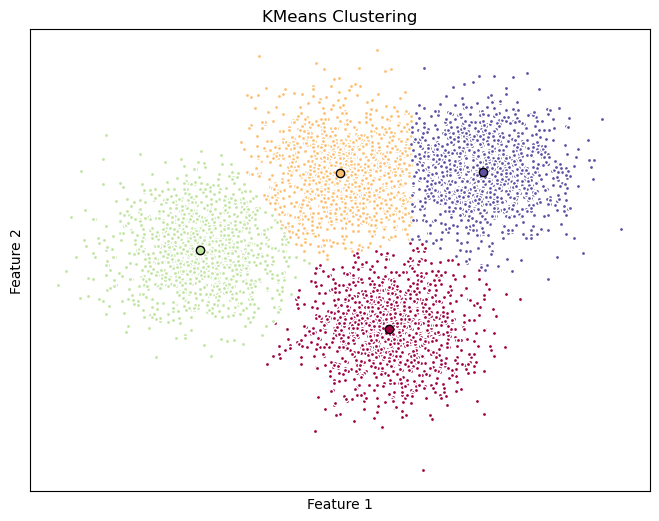

In [10]:
# Create a new figure with a size of 8x6 inches
fig = plt.figure(figsize=(8, 6))

# Generate colors for each cluster label using the Spectral colormap
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))

# Add a subplot to the figure
ax = fig.add_subplot(1, 1, 1)

# Iterate over each cluster to plot its data points and centroid
for k, col in zip(range(len([[4, 4], [-2, -1], [2, -3], [1, 1]])), colors):
    # Create a boolean mask for data points in the current cluster
    my_members = (k_means_labels == k)
    
    # Get the coordinates of the centroid of the current cluster
    cluster_center = k_means_cluster_centers[k]
    
    # Plot data points of the current cluster with white markers
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    
    # Plot centroid of the current cluster with a circle marker
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=6)

# Set title and labels for the plot
ax.set_title('KMeans Clustering')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')

# Remove ticks from both axes
ax.set_xticks(())
ax.set_yticks(())

# Display the plot
plt.show()

**Figure and Axes Setup**:
   - Initializes a figure (`fig`) with specified size (8x6 inches).
   - Adds a subplot (`ax`) to the figure for plotting.

**Color Generation**:
   - Utilizes the Spectral colormap to generate a range of colors for visualizing clusters.

**Plotting Clusters**:
   - Iterates over each cluster, plotting data points with white markers and cluster centroids with larger circles.

**Formatting**:
   - Sets title, axis labels (`Feature 1`, `Feature 2`), and removes numerical ticks for clarity.

**Displaying the Plot**:
   - Shows the finalized plot using `plt.show()`.

This visualization provides insights into how K-means clustering assigns data points to clusters and identifies centroids based on their feature similarities.